执行方法  
pip install pydotplus  
conda install graphviz

In [14]:
## 使用Sklearn调用GBDT模型拟合数据并可视化
import numpy as np
import pydotplus
import os
from sklearn.ensemble import GradientBoostingRegressor
os.environ["PATH"]+=os.pathsep+'/Users/apple/Documents/Effective-Python/' #指定路径
import sklearn
sklearn.__version__

'1.2.2'

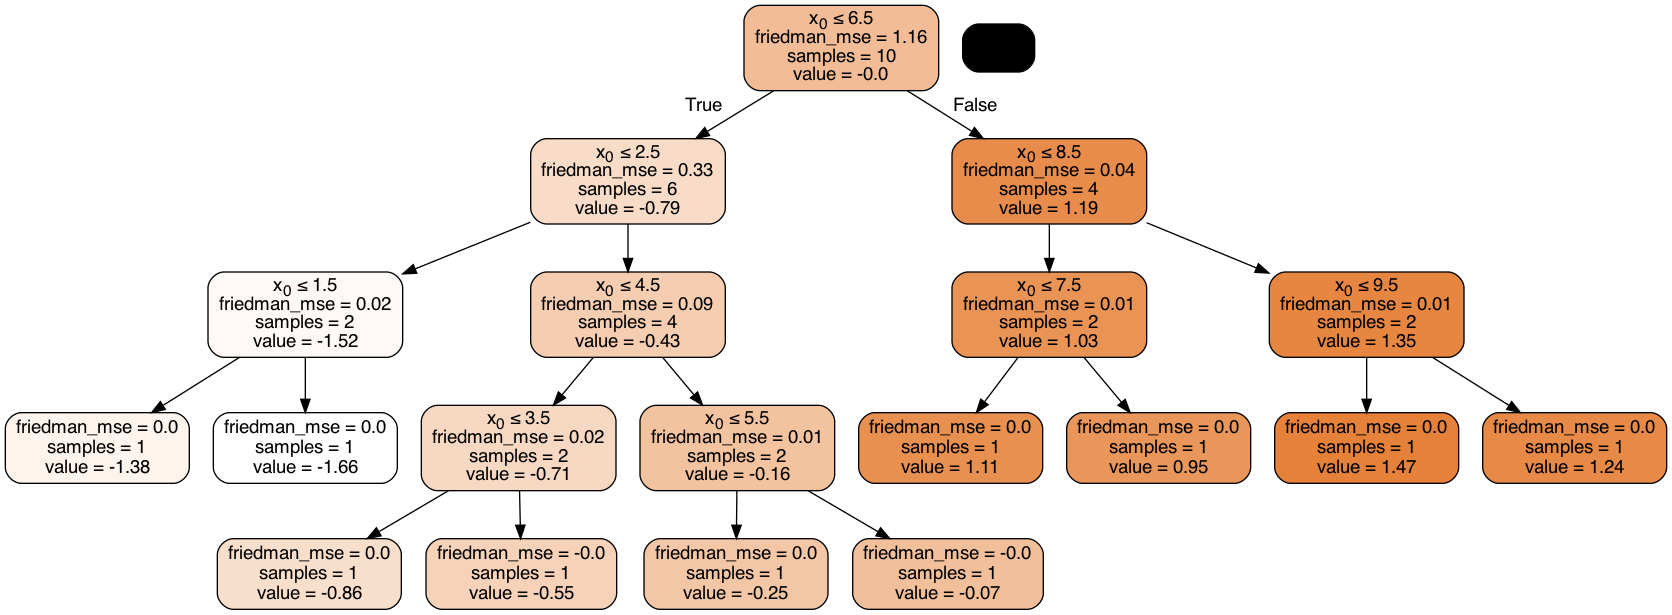

In [15]:
X = np.arange(1, 11).reshape(-1, 1)
y = np.array([5.16, 4.73, 5.95, 6.42, 6.88, 7.15, 8.95, 8.71, 9.50, 9.15])

gbdt = GradientBoostingRegressor(max_depth=4, criterion ='friedman_mse').fit(X, y)
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

## 拟合训练5棵树
sub_tree = gbdt.estimators_[4, 0]
dot_data = export_graphviz(sub_tree, out_file=None, filled=True, rounded=True, special_characters=True, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

根节点 (X0 ≤ 6.5)：

这是树的起始节点，它根据特征 X0 的值是否小于或等于 6.5 来分裂数据。  
内部节点：  

每个内部节点表示一个特征的阈值条件。例如，如果 X0 小于或等于 2.5，则沿着左边的分支继续分裂；否则，沿着右边的分支继续分裂。  
叶子节点：  

叶子节点是树的终端节点，它们不进行进一步分裂。每个叶子节点包含以下信息：  
value：这是该节点的预测值，即模型在该节点的预测输出。  
samples：到达该节点的样本数量。  
mse：均方误差（Mean Squared Error），表示在该节点上模型预测的误差。  

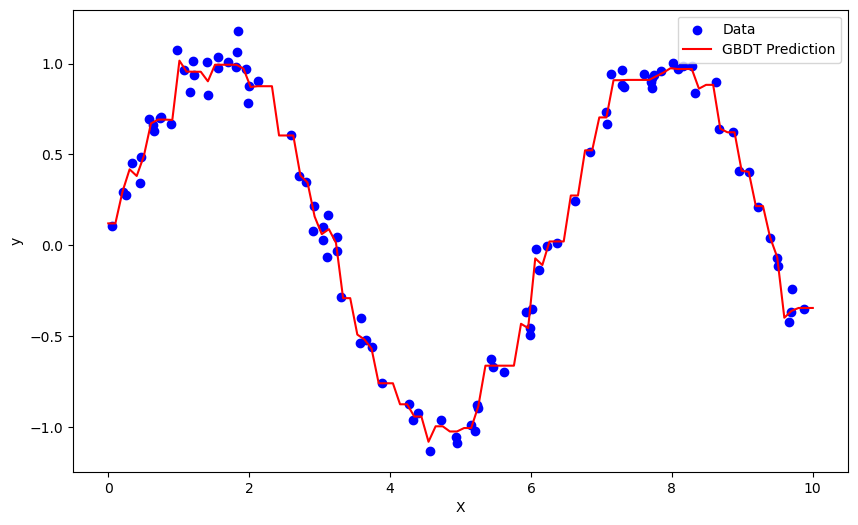

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# 生成一些示例数据
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

# 创建并拟合GBDT模型
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# 预测
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='GBDT Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()